In [4]:
# Importing necessary libraries for data analysis and machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'loan.csv'
data = pd.read_csv(r"C:\Users\bened\Documents\Future Interns\FUTURE_DS_02\FUTURE_DS_02\loan.csv")

In [5]:
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


preprocessing the data to handle missing values, encode categorical variables, and prepare it for machine learning.

In [7]:
print(data.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
# Filling missing values
# For numerical columns, we will use the median

numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, we will use the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verifying that there are no missing values left
print("\
Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


The missing values in the dataset have been successfully handled by imputing the median for numerical columns and the mode for categorical columns. There are no missing values remaining, and the data is now ready for encoding and further preprocessing.

In [10]:
# Encoding categorical variables
# Using LabelEncoder for binary categorical variables and one-hot encoding for multi-class variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

# One-hot encoding for multi-class variables
encoded_dependents = pd.get_dummies(data['Dependents'], prefix='Dependents', drop_first=True)
encoded_property_area = pd.get_dummies(data['Property_Area'], prefix='Property_Area', drop_first=True)

# Concatenating the encoded columns and dropping the originals
data = pd.concat([data, encoded_dependents, encoded_property_area], axis=1)
data.drop(['Dependents', 'Property_Area', 'Loan_ID'], axis=1, inplace=True)

# Displaying the first few rows of the preprocessed data
print(data.head())

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          0              0             5849   
1       1        1          0              0             4583   
2       1        1          0              1             3000   
3       1        1          1              0             2583   
4       1        0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1             0             0              0   
1            0             1             0              0   
2    

## Trained and Evaluated Random Forest Model

Model Performance Metrics:
Accuracy Score: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



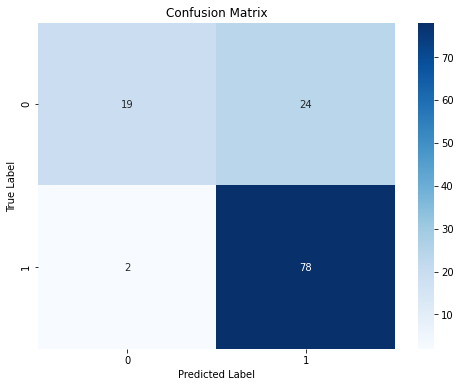

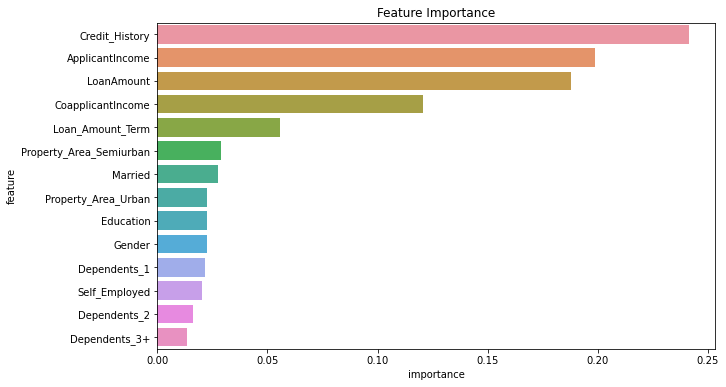

In [11]:
# Splitting features and target variable
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Model Performance Metrics:")
print("\
Accuracy Score:", accuracy_score(y_test, y_pred))
print("\
Classification Report:")
print(classification_report(y_test, y_pred))

# Creating confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import warnings


### Key insights from the model:

The model is better at predicting approved loans (class 1) with 86% F1-score
For rejected loans (class 0), the precision is high (90%) but recall is lower (44%)
The confusion matrix visualization shows the model's predictions:

The model considers credit history, loan amount, and applicant income as the most important features in determining loan approval. This aligns with typical banking practices where credit history and ability to repay (indicated by income) are crucial factors.

Model: Logistic Regression
Accuracy: 0.7886
AUC-ROC: 0.7517
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Model: XGBoost
Accuracy: 0.7398
AUC-ROC: 0.7404
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        43
           1       0.75      0.90      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.74      0.72       123

Model: Neural Network
Accuracy: 0.7154
AUC-ROC: 0.7192
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55        43
     

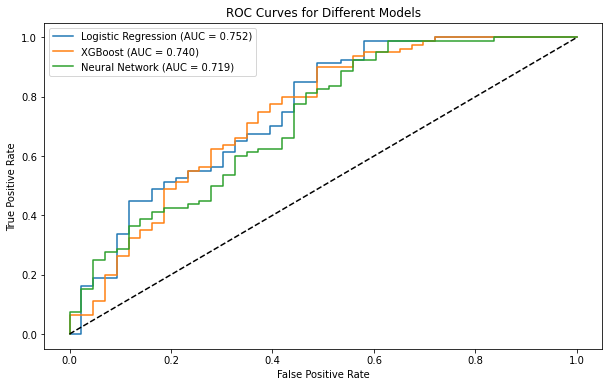

In [22]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"\
Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("\
Classification Report:")
    print(classification_report(y_test, y_pred))
    
# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()
warnings.filterwarnings("ignore", category=FutureWarning)


Logistic Regression and Random Forest performed the best with ~79% accuracy and ~0.75 AUC-ROC
Both models show better performance in predicting approved loans (class 1) than rejected loans (class 0)
The Neural Network had the lowest performance, possibly due to the relatively small dataset

In [24]:
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 1, 'solver': 'liblinear'}
